# Pandas Part 2

Part 1 assumed that the `data.frame` is in a tidy format, with one observation per row and one variable per column. Real-world data is often not so obliging, and we have to clean and wrangle it before we can analyze the data efficiently.

Data cleaning operations 

- Move column to index
- Move index to column
- Rearranging column order
- Change or rename values in the table
- Dealing with missing data
- Dealing with duplicate data

Special operations (strings and categorical variables)

- Splitting single string column into multiple columns
- Joining multiple string columns into single column
- Creating dummy variables from categorical variables for regression or machine learning

Data wrangling (Generally involve changes of shapes)

- Moving data from multiple columns to single column (melt)
- Moving multiple categories in a column to separate columns (pivot)
- Pivoting with aggregation (pivot_table)
- Combining multiple data frames

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

## Data cleaning

### Swapping columns and indexes

In [3]:
df = DataFrame({'pid': ['101','102','103'],
                'age': [23,34,45],
                'wt': [150,160,170]})

In [4]:
df

age  pid   wt
0   23  101  150
1   34  102  160
2   45  103  170

In [5]:
df1 = df.set_index('pid')
df1

age   wt
pid          
101   23  150
102   34  160
103   45  170

In [6]:
df1.reset_index()

pid  age   wt
0  101   23  150
1  102   34  160
2  103   45  170

#### Transforming values with a map 

In [7]:
df['age'] = df['age'].map(lambda x: 'young' if x <= 30 else 'old') 
df

age  pid   wt
0  young  101  150
1    old  102  160
2    old  103  170

#### Explicit replacement

In [8]:
df.replace({23: 'young', 34: 'old', 45: 'old'})

age  pid   wt
0  young  101  150
1    old  102  160
2    old  103  170

### Missing data

In [9]:
%%file assay.txt
pid,mon,tue,wed
101,10,11,12
102,11,-99,13
103,-99,?,10
104,?,?,?

Overwriting assay.txt


In [10]:
df = pd.read_csv('assay.txt', na_values=['-99', '?'], index_col=0)

In [11]:
df

mon   tue   wed
pid                  
101  10.0  11.0  12.0
102  11.0   NaN  13.0
103   NaN   NaN  10.0
104   NaN   NaN   NaN

In [12]:
df.isnull()

mon    tue    wed
pid                     
101  False  False  False
102  False   True  False
103   True   True  False
104   True   True   True

In [13]:
df.notnull()

mon    tue    wed
pid                     
101   True   True   True
102   True  False   True
103  False  False   True
104  False  False  False

#### Drop any row containing missing data

In [14]:
df.dropna()

mon   tue   wed
pid                  
101  10.0  11.0  12.0

#### Drop only rows where all data is missing

In [15]:
df.dropna(how='all')

mon   tue   wed
pid                  
101  10.0  11.0  12.0
102  11.0   NaN  13.0
103   NaN   NaN  10.0

#### Drop any column with missing data

In [16]:
df.dropna(how='all').dropna(axis=1)

wed
pid      
101  12.0
102  13.0
103  10.0

#### Simple imputation

In [17]:
df

mon   tue   wed
pid                  
101  10.0  11.0  12.0
102  11.0   NaN  13.0
103   NaN   NaN  10.0
104   NaN   NaN   NaN

#### Fill with column mean

In [18]:
df.fillna(df.mean(0))

mon   tue        wed
pid                       
101  10.0  11.0  12.000000
102  11.0  11.0  13.000000
103  10.5  11.0  10.000000
104  10.5  11.0  11.666667

#### Fill wiht specific values

In [19]:
df.fillna(0)

mon   tue   wed
pid                  
101  10.0  11.0  12.0
102  11.0   0.0  13.0
103   0.0   0.0  10.0
104   0.0   0.0   0.0

In [20]:
df.fillna({'mon': 10, 'tue': 11, 'wed': 12})

mon   tue   wed
pid                  
101  10.0  11.0  12.0
102  11.0  11.0  13.0
103  10.0  11.0  10.0
104  10.0  11.0  12.0

### Duplicate data

In [21]:
%%file assay2.txt
pid,mon,tue,wed
101,10,11,12
102,11,12,13
103,10,10,10
102,11,12,13 # duplicate row
102,10,11,14 # duplicate pid
101,10,11,12 # duplicate row

Overwriting assay2.txt


In [22]:
df = pd.read_csv('assay2.txt', comment='#')

In [23]:
df

pid  mon  tue  wed
0  101   10   11   12
1  102   11   12   13
2  103   10   10   10
3  102   11   12   13
4  102   10   11   14
5  101   10   11   12

In [24]:
df.duplicated()

0    False
1    False
2    False
3     True
4    False
5     True
dtype: bool

In [25]:
df.duplicated(subset=['pid'])

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [26]:
df.drop_duplicates()

pid  mon  tue  wed
0  101   10   11   12
1  102   11   12   13
2  103   10   10   10
4  102   10   11   14

In [27]:
df.drop_duplicates(subset=['pid'], keep='first')

pid  mon  tue  wed
0  101   10   11   12
1  102   11   12   13
2  103   10   10   10

## Special operations on strings and factors

### Strings

In [28]:
%%file assay3.txt
id,mon,tue,wed
101:duke:2017,10,11,12
102:duke:2017,11,12,13
103:duke:2017,10,10,10
102:unc:2016,11,12,13
102:unc:2017,10,11,14
101:unc:2017,10,11,12

Overwriting assay3.txt


In [29]:
df = pd.read_csv('assay3.txt')

In [30]:
df

id  mon  tue  wed
0  101:duke:2017   10   11   12
1  102:duke:2017   11   12   13
2  103:duke:2017   10   10   10
3   102:unc:2016   11   12   13
4   102:unc:2017   10   11   14
5   101:unc:2017   10   11   12

In [31]:
df.id.str.split(':')

0    [101, duke, 2017]
1    [102, duke, 2017]
2    [103, duke, 2017]
3     [102, unc, 2016]
4     [102, unc, 2017]
5     [101, unc, 2017]
Name: id, dtype: object

In [32]:
df.id.str.split(':').str[-1]

0    2017
1    2017
2    2017
3    2016
4    2017
5    2017
Name: id, dtype: object

In [33]:
df[['pid', 'site', 'year']] = df.id.str.split(':', expand=True)
df

id  mon  tue  wed  pid  site  year
0  101:duke:2017   10   11   12  101  duke  2017
1  102:duke:2017   11   12   13  102  duke  2017
2  103:duke:2017   10   10   10  103  duke  2017
3   102:unc:2016   11   12   13  102   unc  2016
4   102:unc:2017   10   11   14  102   unc  2017
5   101:unc:2017   10   11   12  101   unc  2017

#### Rearrange and drop old id column

In [34]:
df.iloc[:, np.r_[4:7, 1:4]]

pid  site  year  mon  tue  wed
0  101  duke  2017   10   11   12
1  102  duke  2017   11   12   13
2  103  duke  2017   10   10   10
3  102   unc  2016   11   12   13
4  102   unc  2017   10   11   14
5  101   unc  2017   10   11   12

In [35]:
df.id.str.extract(r'.*:(.*):(.*)', expand=True)

0     1
0  duke  2017
1  duke  2017
2  duke  2017
3   unc  2016
4   unc  2017
5   unc  2017

In [36]:
df[df.id.str.contains('unc')]

id  mon  tue  wed  pid site  year
3  102:unc:2016   11   12   13  102  unc  2016
4  102:unc:2017   10   11   14  102  unc  2017
5  101:unc:2017   10   11   12  101  unc  2017

#### Joining multiple string columns

In [37]:
df.pid + ':' + df.site + ':' + df.year

0    101:duke:2017
1    102:duke:2017
2    103:duke:2017
3     102:unc:2016
4     102:unc:2017
5     101:unc:2017
dtype: object

#### Another method if you are combining LOTS of columns

In [38]:
df.iloc[:, -3:].astype('str').add(':').sum(axis=1).str[:-1]

0    101:duke:2017
1    102:duke:2017
2    103:duke:2017
3     102:unc:2016
4     102:unc:2017
5     101:unc:2017
dtype: object

### Categorical variables

In [39]:
df = df.iloc[:, np.r_[4:7, 1:4]]
df

pid  site  year  mon  tue  wed
0  101  duke  2017   10   11   12
1  102  duke  2017   11   12   13
2  103  duke  2017   10   10   10
3  102   unc  2016   11   12   13
4  102   unc  2017   10   11   14
5  101   unc  2017   10   11   12

In [40]:
pd.options.mode.chained_assignment = None # turns off harmless warning
df['pid'] = df['pid'].astype('category')
df['site'] = df['site'].astype('category')

In [41]:
df.site

0    duke
1    duke
2    duke
3     unc
4     unc
5     unc
Name: site, dtype: category
Categories (2, object): [duke, unc]

In [42]:
df.site.cat.codes

0    0
1    0
2    0
3    1
4    1
5    1
dtype: int8

In [43]:
df.site.cat.categories

Index(['duke', 'unc'], dtype='object')

In [44]:
df.site.cat.reorder_categories(['unc', 'duke'], ordered=True)

0    duke
1    duke
2    duke
3     unc
4     unc
5     unc
Name: site, dtype: category
Categories (2, object): [unc < duke]

#### One-hot encoding

For regression models, it is often necessary to convert a single column of categorical variables into dummy variable, with one dummy variable for each possible category. In machine learning applications, this is known as one-hot encoding. 

In [45]:
n = 10
race = np.random.choice(['white', 'black', 'brown', 'yellow'], n)
vals = np.random.random(n)
df = DataFrame(dict(race=race, vals=vals))

In [46]:
df

race      vals
0   brown  0.260416
1   white  0.079823
2   black  0.912978
3   black  0.711759
4   white  0.059453
5   brown  0.024857
6   white  0.960330
7   brown  0.870268
8  yellow  0.008312
9   brown  0.345326

In [47]:
df['race'] = df['race'].astype('category')

In [48]:
df.race

0     brown
1     white
2     black
3     black
4     white
5     brown
6     white
7     brown
8    yellow
9     brown
Name: race, dtype: category
Categories (4, object): [black, brown, white, yellow]

In [49]:
df1 = pd.get_dummies(df.race)
df1

black  brown  white  yellow
0      0      1      0       0
1      0      0      1       0
2      1      0      0       0
3      1      0      0       0
4      0      0      1       0
5      0      1      0       0
6      0      0      1       0
7      0      1      0       0
8      0      0      0       1
9      0      1      0       0

In [50]:
df.join(df1)

race      vals  black  brown  white  yellow
0   brown  0.260416      0      1      0       0
1   white  0.079823      0      0      1       0
2   black  0.912978      1      0      0       0
3   black  0.711759      1      0      0       0
4   white  0.059453      0      0      1       0
5   brown  0.024857      0      1      0       0
6   white  0.960330      0      0      1       0
7   brown  0.870268      0      1      0       0
8  yellow  0.008312      0      0      0       1
9   brown  0.345326      0      1      0       0

## Data Wrangling

### Hierarchical indexing

In [51]:
birth_weight = np.random.normal(7, 1, 8)
df = DataFrame(birth_weight,
               index=[['anne']*3 + ['bella']*3 + ['carrie']*2,
                      [1,2,3,1,2,3,1,2]],
               columns=['weight'])
df.index.names = ['women', 'pregnancy']

In [52]:
df

weight
women  pregnancy          
anne   1          8.661477
       2          6.524455
       3          7.052574
bella  1          7.183759
       2          7.095648
       3          9.075680
carrie 1          6.659004
       2          8.807852

In [53]:
df.index

MultiIndex(levels=[['anne', 'bella', 'carrie'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1]],
           names=['women', 'pregnancy'])

#### Swapping levels

In [54]:
df.swaplevel().sort_index(0)

weight
pregnancy women           
1         anne    8.661477
          bella   7.183759
          carrie  6.659004
2         anne    6.524455
          bella   7.095648
          carrie  8.807852
3         anne    7.052574
          bella   9.075680

#### Partial indexing

In [55]:
df.loc['bella']

weight
pregnancy          
1          7.183759
2          7.095648
3          9.075680

#### Unstack

This rotates from the rows to the columns.

In [56]:
df.unstack(level=0)

weight                    
women          anne     bella    carrie
pregnancy                              
1          8.661477  7.183759  6.659004
2          6.524455  7.095648  8.807852
3          7.052574  9.075680       NaN

In [57]:
df.unstack(level=1)

weight                    
pregnancy         1         2         3
women                                  
anne       8.661477  6.524455  7.052574
bella      7.183759  7.095648  9.075680
carrie     6.659004  8.807852       NaN

#### Stack

This rotates from the columns to the rows

In [58]:
s1 = df.unstack(level=0)

In [59]:
s1

weight                    
women          anne     bella    carrie
pregnancy                              
1          8.661477  7.183759  6.659004
2          6.524455  7.095648  8.807852
3          7.052574  9.075680       NaN

In [60]:
s1.stack(level=0)

women                 anne     bella    carrie
pregnancy                                     
1         weight  8.661477  7.183759  6.659004
2         weight  6.524455  7.095648  8.807852
3         weight  7.052574  9.075680       NaN

In [61]:
s1.stack(level=1)

weight
pregnancy women           
1         anne    8.661477
          bella   7.183759
          carrie  6.659004
2         anne    6.524455
          bella   7.095648
          carrie  8.807852
3         anne    7.052574
          bella   9.075680

#### "Flattening" a hierarchical index

In [62]:
df.reset_index()

women  pregnancy    weight
0    anne          1  8.661477
1    anne          2  6.524455
2    anne          3  7.052574
3   bella          1  7.183759
4   bella          2  7.095648
5   bella          3  9.075680
6  carrie          1  6.659004
7  carrie          2  8.807852

In [63]:
df.reset_index(level=0)

women    weight
pregnancy                  
1            anne  8.661477
2            anne  6.524455
3            anne  7.052574
1           bella  7.183759
2           bella  7.095648
3           bella  9.075680
1          carrie  6.659004
2          carrie  8.807852

#### Summary by level

In [64]:
df

weight
women  pregnancy          
anne   1          8.661477
       2          6.524455
       3          7.052574
bella  1          7.183759
       2          7.095648
       3          9.075680
carrie 1          6.659004
       2          8.807852

In [65]:
df.mean(level=0)

weight
women           
anne    7.412835
bella   7.785029
carrie  7.733428

In [66]:
df.mean(level=1)

weight
pregnancy          
1          7.501413
2          7.475985
3          8.064127

### Reshape and pivot data

In [67]:
%load_ext rpy2.ipython

In [68]:
iris = %R iris

In [69]:
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa

#### From wide to long

This is often necessary for plotting routines

In [70]:
iris1 = pd.melt(iris, id_vars=['Species'])
iris1.head()

Species      variable  value
0  setosa  Sepal.Length    5.1
1  setosa  Sepal.Length    4.9
2  setosa  Sepal.Length    4.7
3  setosa  Sepal.Length    4.6
4  setosa  Sepal.Length    5.0

In [71]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

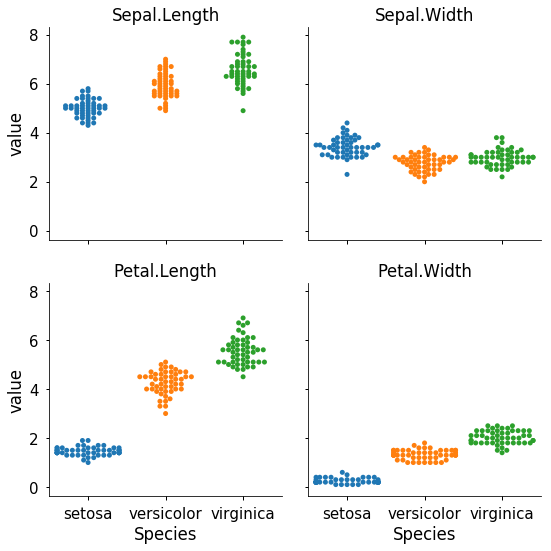

In [72]:
g = sns.factorplot(data=iris1, x='Species', y='value', 
                   col='variable', col_wrap=2,
                   kind='swarm')
g.set_titles('{col_name}')
pass

#### Pivot

Pivot splits a column into multiple columns

In [73]:
pid = np.r_[0:5, 0:5]
time = ['A']*5 + ['B']*5
val = np.random.normal(10,1,10)
df = DataFrame(dict(pid=pid, time=time, val=val), 
               columns=['pid', 'time', 'val'])

In [74]:
df

pid time        val
0    0    A   9.066841
1    1    A   9.113788
2    2    A  10.965594
3    3    A   9.848895
4    4    A   9.194968
5    0    B  10.819055
6    1    B   9.900527
7    2    B  11.007177
8    3    B   9.586152
9    4    B   9.486819

In [75]:
df.pivot(index='time', columns='pid')

val                                         
pid           0         1          2         3         4
time                                                    
A      9.066841  9.113788  10.965594  9.848895  9.194968
B     10.819055  9.900527  11.007177  9.586152  9.486819

In [76]:
df.pivot(index='pid', columns='time', values='val')

time          A          B
pid                       
0      9.066841  10.819055
1      9.113788   9.900527
2     10.965594  11.007177
3      9.848895   9.586152
4      9.194968   9.486819

Note that `pivot` is `set_index` followed by `unstack

In [77]:
df.set_index(['pid', 'time'])

val
pid time           
0   A      9.066841
1   A      9.113788
2   A     10.965594
3   A      9.848895
4   A      9.194968
0   B     10.819055
1   B      9.900527
2   B     11.007177
3   B      9.586152
4   B      9.486819

In [78]:
df.set_index(['pid', 'time']).unstack('time')

val           
time          A          B
pid                       
0      9.066841  10.819055
1      9.113788   9.900527
2     10.965594  11.007177
3      9.848895   9.586152
4      9.194968   9.486819

`pivot` can be reversed by `melt`.

In [79]:
df1 = df.pivot(index='pid', columns='time', values='val')
df1

time          A          B
pid                       
0      9.066841  10.819055
1      9.113788   9.900527
2     10.965594  11.007177
3      9.848895   9.586152
4      9.194968   9.486819

In [80]:
df1 = df1.reset_index()
df1

time  pid          A          B
0       0   9.066841  10.819055
1       1   9.113788   9.900527
2       2  10.965594  11.007177
3       3   9.848895   9.586152
4       4   9.194968   9.486819

In [81]:
pd.melt(df1, ['pid'])

pid time      value
0    0    A   9.066841
1    1    A   9.113788
2    2    A  10.965594
3    3    A   9.848895
4    4    A   9.194968
5    0    B  10.819055
6    1    B   9.900527
7    2    B  11.007177
8    3    B   9.586152
9    4    B   9.486819

### Pivot tables and cross-tabulation

Pivot tables can be an alternative to using `groupby`. They are also useful for calculating marginals.

In [82]:
pid = np.r_[0:4, 0:4]
time = ['A']*4 + ['B']*4
grp = np.tile(['Case', 'Control'], 4)
val = np.random.normal(10,1,8)
df = DataFrame(dict(pid=pid, grp=grp, time=time, val=val), 
               columns=['pid', 'grp', 'time', 'val'])

In [83]:
df

pid      grp time        val
0    0     Case    A   9.081981
1    1  Control    A   9.068653
2    2     Case    A   9.346933
3    3  Control    A   8.895022
4    0     Case    B  11.139738
5    1  Control    B  10.489634
6    2     Case    B   9.913781
7    3  Control    B   9.703207

In [84]:
df.pivot_table(index=['pid', 'grp'])

val
pid grp               
0   Case     10.110860
1   Control   9.779143
2   Case      9.630357
3   Control   9.299114

In [85]:
df.pivot_table(index=['pid', 'time'])

val
pid time           
0   A      9.081981
    B     11.139738
1   A      9.068653
    B     10.489634
2   A      9.346933
    B      9.913781
3   A      8.895022
    B      9.703207

In [86]:
df.pivot_table(index='pid', columns=['grp'])

val          
grp       Case   Control
pid                     
0    10.110860       NaN
1          NaN  9.779143
2     9.630357       NaN
3          NaN  9.299114

In [87]:
df.pivot_table(index='pid')

val
pid           
0    10.110860
1     9.779143
2     9.630357
3     9.299114

In [88]:
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa

In [89]:
iris.pivot_table(index='Species', aggfunc='mean')

Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
Species                                                         
setosa             1.462        0.246         5.006        3.428
versicolor         4.260        1.326         5.936        2.770
virginica          5.552        2.026         6.588        2.974

In [90]:
iris.pivot_table(index='Species', 
                 values=['Petal.Length', 'Petal.Width'], 
                 aggfunc='mean')

Petal.Length  Petal.Width
Species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026

In [91]:
iris.pivot_table(index='Species', 
                 values=['Petal.Length', 'Petal.Width'], 
                 aggfunc='mean',
                 margins=True)

Petal.Length  Petal.Width
Species                              
setosa             1.462     0.246000
versicolor         4.260     1.326000
virginica          5.552     2.026000
All                3.758     1.199333

#### Simple cross tabulation of margins

In [92]:
deaths = [10, 12, 15, 18]
sex = ['m', 'f', 'm', 'f']
smoker = ['n', 'n', 'y', 'y']
df = DataFrame(dict(deaths=deaths, sex=sex, smoker=smoker))

In [93]:
df

deaths sex smoker
0      10   m      n
1      12   f      n
2      15   m      y
3      18   f      y

In [94]:
df.pivot_table(index='smoker', columns='sex', aggfunc='sum', margins=True)

deaths        
sex         f   m All
smoker               
n          12  10  22
y          18  15  33
All        30  25  55

#### Cross-tabulation

In [95]:
smoker = np.random.choice(['y', 'n'], 100)
status = np.random.choice(['alive', 'dead'], 100)

In [96]:
pd.crosstab(smoker, status, margins=True)

col_0  alive  dead  All
row_0                  
n         22    29   51
y         26    23   49
All       48    52  100

#### We cna do this with pivot_table but it takes a bit more work

In [97]:
df = DataFrame(dict(smoker=smoker, status=status, val=np.ones(100)))

In [98]:
df.head()

smoker status  val
0      y  alive  1.0
1      n   dead  1.0
2      n  alive  1.0
3      y   dead  1.0
4      y  alive  1.0

In [99]:
df.pivot_table(index='smoker', columns='status', aggfunc='count', margins=True)

val          
status alive dead  All
smoker                
n         22   29   51
y         26   23   49
All       48   52  100

### Merging data

In [100]:
pids1 = [101, 102, 103]
vals1 = [10, 20, 30]
pids2 = [104,105,106]
vals2 = [40, 50, 60]
pids3 = [101, 103, 105]
vals3 = [70, 80, 90]

In [101]:
df1 = DataFrame(dict(pid=pids1, x=vals1))
df2 = DataFrame(dict(pid=pids2, x=vals2))
df3 = DataFrame(dict(pid=pids1, y=vals2))
df4 = DataFrame(dict(pid=pids3, y=vals3))
df5 = DataFrame(dict(pid=pids1, z=vals2))

#### Appending rows

In [102]:
df1

pid   x
0  101  10
1  102  20
2  103  30

In [103]:
df2

pid   x
0  104  40
1  105  50
2  106  60

In [104]:
pd.concat([df1, df2])

pid   x
0  101  10
1  102  20
2  103  30
0  104  40
1  105  50
2  106  60

In [105]:
pd.concat([df1, df2]).reset_index(drop=True)

pid   x
0  101  10
1  102  20
2  103  30
3  104  40
4  105  50
5  106  60

#### Database style joins

In [106]:
df1

pid   x
0  101  10
1  102  20
2  103  30

In [107]:
df3

pid   y
0  101  40
1  102  50
2  103  60

In [108]:
df

smoker status  val
0       y  alive  1.0
1       n   dead  1.0
2       n  alive  1.0
3       y   dead  1.0
4       y  alive  1.0
5       y  alive  1.0
6       y   dead  1.0
7       n  alive  1.0
8       y  alive  1.0
9       y  alive  1.0
10      y  alive  1.0
11      y   dead  1.0
12      y   dead  1.0
13      n   dead  1.0
14      n   dead  1.0
15      n  alive  1.0
16      y   dead  1.0
17      y   dead  1.0
18      y  alive  1.0
19      y   dead  1.0
20      n   dead  1.0
21      n  alive  1.0
22      n   dead  1.0
23      n   dead  1.0
24      n   dead  1.0
25      y   dead  1.0
26      n   dead  1.0
27      n   dead  1.0
28      y  alive  1.0
29      y  alive  1.0
..    ...    ...  ...
70      n   dead  1.0
71      n  alive  1.0
72      n  alive  1.0
73      n   dead  1.0
74      n  alive  1.0
75      n   dead  1.0
76      y  alive  1.0
77      y   dead  1.0
78      n   dead  1.0
79      n   dead  1.0
80      n   dead  1.0
81      n  alive  1.0
82      y   dead  1.0
83      y   dead  1.0
84      y   dead  1.0
85      y  alive  1.0
86      n   dead  1.0
87      n   dead  1.0
88      n  alive  1.0
89      n  alive  1.0
90      y  alive  1.0
91      y  alive  1.0
92      y   dead  1.0
93      n   dead  1.0
94      y   dead  1.0
95      n   dead  1.0
96      n  alive  1.0
97      n  alive  1.0
98      y   dead  1.0
99      y   dead  1.0

[100 rows x 3 columns]

#### Merge joins on a column or columns 

If `on` argument not specified, merge on all columns with same name.

In [109]:
pd.merge(df1, df3)

pid   x   y
0  101  10  40
1  102  20  50
2  103  30  60

In [110]:
pd.merge(df1, df4, on='pid', how='inner')

pid   x   y
0  101  10  70
1  103  30  80

In [111]:
pd.merge(df1, df4, on='pid', how='left')

pid   x     y
0  101  10  70.0
1  102  20   NaN
2  103  30  80.0

In [112]:
pd.merge(df1, df4, on='pid', how='right')

pid     x   y
0  101  10.0  70
1  103  30.0  80
2  105   NaN  90

In [113]:
pd.merge(df1, df4, on='pid', how='outer')

pid     x     y
0  101  10.0  70.0
1  102  20.0   NaN
2  103  30.0  80.0
3  105   NaN  90.0

#### Joining on common index

In [114]:
df1.set_index('pid', inplace=True)
df4.set_index('pid', inplace=True)
df5.set_index('pid', inplace=True)

In [115]:
df1

x
pid    
101  10
102  20
103  30

In [116]:
df4

y
pid    
101  70
103  80
105  90

In [117]:
df5

z
pid    
101  40
102  50
103  60

If the data frames share a common index, `join` can combine mulitple data frames at once.

In [118]:
df1.join([df4, df5], how='outer')

x     y     z
pid                  
101  10.0  70.0  40.0
102  20.0   NaN  50.0
103  30.0  80.0  60.0
105   NaN  90.0   NaN